In [4]:
import pandas as pd  # for easily manipulating databases
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for plotting

# Load the dataset and explore

The diabetes dataset contains 11 measurements from a cohort of N = 442 patients with diabetes, and we are most interested in the column labeled “Y”, which is some clinical measure of disease progression taken one year after the rest of the measurements are taken.

So we will want to predict Y from the 10 other variables, which are the predictors.

In [5]:
df = pd.read_csv('./diabetes.csv')
print(df)
print(df.columns) # to see the variable names

     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]
Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')


In [6]:
df['BMI']

0      32.1
1      21.6
2      30.5
3      25.3
4      23.0
       ... 
437    28.2
438    24.9
439    24.9
440    30.0
441    19.6
Name: BMI, Length: 442, dtype: float64

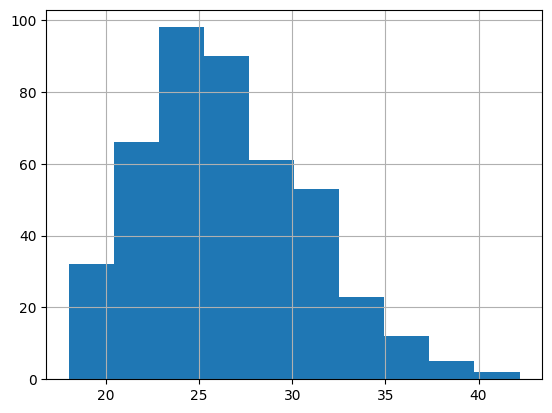

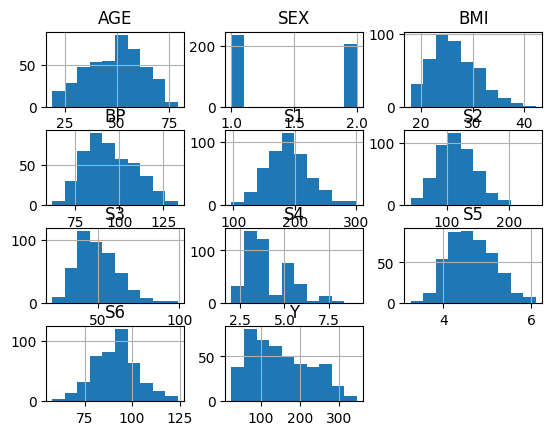

In [7]:
df['BMI'].hist()  # to plot a histogram of the BMI variable
df.hist() # will give you a histogram of every variable
plt.show() # If you are using IPython instead of Jupyter, use this to see the plot

### Question1:
Which variables are continuous and which are not? 

**Answer:** The plot above makes it clear that 'SEX' should be treated as a binary variable.

### Question 2:
How do we handle the variables that are not continuous in the regression model? 

**Answer:** We can encode binary variables as a 0-1 vector. For discrete variables that have multiple categories, we can use a one-hot encoding where we add *k* additional 0-1 variables that are mutually exclusive.

### Question 3:
'Y' is the target variable. Extract it from the dataframe and create a separate matrix of predictors where any discrete variables are encoded appropriately.

In [8]:
Y = df['Y']

# Encode the sex variable
# if you are new to python, you can use a loop
n = df.shape[0]  # the number of measurements
sex = np.zeros(n)  # creates a vector of zeros
for i in range(n):
    if df['SEX'].iloc[i] == 1: 
        # iloc means to index the dataframe by integer location, not by label. 
        # It's important. Google it to learn more.
        sex[i] = 1
    else:
        sex[i] = 0

# sex = (df['SEX'] == 1).astype(int)  # this is a faster way to encode the sex variable using vectorization

columns_i_want = ['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
X = df[columns_i_want]
# X = df[[key for key in df.columns if (key != 'SEX') and (key != 'Y')]]  # cleaner way to do the selection above

X['SEX=1'] = sex  # this is how to add a new variable to a DataFrame

print(Y)  
print(X)  

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: Y, Length: 442, dtype: int64
     AGE   BMI      BP   S1     S2    S3    S4      S5   S6  SEX=1
0     59  32.1  101.00  157   93.2  38.0  4.00  4.8598   87    0.0
1     48  21.6   87.00  183  103.2  70.0  3.00  3.8918   69    1.0
2     72  30.5   93.00  156   93.6  41.0  4.00  4.6728   85    0.0
3     24  25.3   84.00  198  131.4  40.0  5.00  4.8903   89    1.0
4     50  23.0  101.00  192  125.4  52.0  4.00  4.2905   80    1.0
..   ...   ...     ...  ...    ...   ...   ...     ...  ...    ...
437   60  28.2  112.00  185  113.8  42.0  4.00  4.9836   93    0.0
438   47  24.9   75.00  225  166.0  42.0  5.00  4.4427  102    0.0
439   60  24.9   99.67  162  106.6  43.0  3.77  4.1271   95    0.0
440   36  30.0   95.00  201  125.2  42.0  4.79  5.1299   85    1.0
441   36  19.6   71.00  250  133.2  97.0  3.00  4.5951   92    1.0

[442 rows x 10 columns]


/var/folders/7j/0rhz18qs4d9dzfjkz9p2xlcr0000gn/T/ipykernel_92137/4021573221.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SEX=1'] = sex  # this is how to add a new variable to a DataFrame


# Ordinary linear regression with statsmodels

statsmodels is a popular statistic module in Python. We will use it to fit ordinary least squares on the dataset. Run the following code to fit linear regression and print the results. Note that we do not need to re-scale the predictors for least squares (though you can if you want to, as it often helps interpretation.) 

This code assumes you correctly prepared a the data 'Y' and 'X' as instructed above.

In [9]:
import statsmodels.api as sm  # load statsmodels

X_ = sm.add_constant(X)  # this is how you add a constant term (for the intercept)
est = sm.OLS(Y, X_).fit()  # fits the least squares estimate
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           3.83e-62
Time:                        19:05:32   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -380.2864     67.168     -5.662      0.0

In [9]:
int(len(df) * .85)  # the number of training data points in each train/test split

375

### Question 4:
Identify the coefficient estimates. Which predictors are we quite sure are important for the prediction? (Also, do you see the confidence intervals? What number represents the percentiles of a Gaussian distribution like you learned in lecture?)

***Answer:*** At significance level 0.05 (the standard choice), we would say 'BMI', 'BP', 'S5', and 'SEX=1' (or whatever you called your gender encoding) are important for the prediction. The final two columns of the summary represent the confidence interval, with the 2.5% and 97.5% percentile points.

A note: Gender is not really being handled appropriately here. We really should have interaction terms between gender and one or more other variables. We do not explore this more here.

We see the package say there's strong multi-collinearity in the data (that is, two or more variables are highly correlated). Let's print the correlation matrix to investigate this:

In [10]:
X.corr()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,SEX=1
AGE,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,-0.173737
BMI,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,-0.088161
BP,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,-0.241010
S1,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,-0.035277
S2,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,-0.142637
S3,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,0.379090
S4,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,-0.332115
S5,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,-0.149916
S6,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,-0.208133
SEX=1,-0.173737,-0.088161,-0.241010,-0.035277,-0.142637,0.379090,-0.332115,-0.149916,-0.208133,1.000000


I see that S1 and S2 have pretty high correlation. You could consider removing one of them... 

# Shrinkage with scikit-learn

In the statsmodels print out, we see it warn us that there is likely strong multicollinearity in the data. We therefore know that we should explore using shrinkage methods.

### Question 5:

Use scikit-learn to compare linear regression, ridge regression, and Lasso on this dataset. You should be using a method like cross validation to compute the average squared prediction error over multiple test sets. (If you do not want to code up K-fold cross validation by hand, instead consider using test sets that are just random subsets of the dataset.)

Consider how you should choose the the penalty parameter \lambda (it would be best to use a validation set approach, where you select \lambda using a method like cross validation using the training data only).

Note that cross validation is being used in two separate ways in this exercise: To select the penalty parameter \lambda, and to compare predictive performance of the models.

To make this exercise easier, you can remove the gender variable for now.

Remember that we must standardize the predictors before using ridge regression and Lasso. Below the key functions are provided for you. You should certainly read their documentation to learn more about them.

In [11]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
import time

"""
lr = LinearRegression(fit_intercept=True).fit(X_train, Y_train)  # Linear regression with an intercept. Do NOT use X_ from statsmodels.
Y_pred = lr.predict(X_test)  # prediction on a test set

ridge = RidgeCV(alphas=np.linspace(0.001, 10.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Ridge regression with an intercept. Selects the penalty from among 100 linearly spaced values in (0.001, 100) using 10-fold cross validation.
Y_pred = ridge.predict(X_test)  # prediction on a test set

lasso = LassoCV(alphas=np.linspace(0.001, 10.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Lasso with an intercept. Selects the penalty from among 100 linearly spaced values in (0.001, 100) using 10-fold cross validation.
Y_pred = lasso.predict(X_test)  # prediction on a test set
"""

# Instead of K-fold cross validation, I will just take random subsets of the dataset, which is easier to implement.
n_cv = 100

errors_lr = []  # these are containers to hold the test set errors
errors_ridge = []
coefs_ridge = []
errors_lasso = []

indices = list(range(len(df)))  # how we will index the dataset
n_train = int(len(df) * .85)  # each split will have 85% train and 15% test

# iterate through the test sets
for k in range(n_cv):
    
    t_start = time.time()
    
    np.random.shuffle(indices)  # shuffle the indices. this function works in-place
    train_inds = indices[:n_train]  # slice out the training indices
    test_inds = indices[n_train:]

    # split the data into training and test sets
    Y_train = Y.iloc[train_inds]  # it is very important to remember to use iloc if using integer index
    X_train = X.iloc[train_inds, :].copy()
    
    Y_test = Y.iloc[test_inds]
    X_test = X.iloc[test_inds, :].copy()
    
    # standardize the predictors (don't standardize the gender variable)
    for feature_name in ['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']:
        mean_ = X_train[feature_name].mean()
        std_ = X_train[feature_name].std()
        X_train[feature_name] = (X_train[feature_name] - mean_) / std_
        # we must use the training statistics to transform the test set!
        X_test[feature_name] = (X_test[feature_name] - mean_) / std_          
    
    # Now fit the models on the training set and predict the test targets
    lr = LinearRegression(fit_intercept=True).fit(X_train, Y_train)  # Linear regression with an intercept. Do NOT use X_ from statsmodels.
    Y_pred = lr.predict(X_test)  # prediction on a test set
    rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))  # root mean squared error is more interpretable than MSE
    errors_lr.append(rmse)

    ridge = RidgeCV(alphas=np.linspace(0.001, 100.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Ridge regression with an intercept. Selects the penalty from among 0.1, 1.0, and 10 using 5-fold cross validation.
    Y_pred = ridge.predict(X_test) 
    rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
    errors_ridge.append(rmse)
    coefs_ridge.append(ridge.coef_)
 
    lasso = LassoCV(alphas=np.linspace(0.001, 100.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Lasso with an intercept. Selects the penalty from among 0.1, 1.0, and 10 using 5-fold cross validation.
    Y_pred = lasso.predict(X_test)
    rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
    errors_lasso.append(rmse)
    
    t_iter = time.time() - t_start
    print("Finished iteration %d in %.2f secs" % (k, t_iter))

Finished iteration 0 in 1.69 secs
Finished iteration 1 in 1.72 secs
Finished iteration 2 in 1.65 secs
Finished iteration 3 in 1.69 secs
Finished iteration 4 in 1.58 secs
Finished iteration 5 in 1.57 secs
Finished iteration 6 in 1.66 secs
Finished iteration 7 in 1.56 secs
Finished iteration 8 in 1.56 secs
Finished iteration 9 in 1.56 secs
Finished iteration 10 in 1.55 secs
Finished iteration 11 in 1.55 secs
Finished iteration 12 in 1.59 secs
Finished iteration 13 in 1.54 secs
Finished iteration 14 in 1.54 secs
Finished iteration 15 in 1.54 secs
Finished iteration 16 in 1.54 secs
Finished iteration 17 in 1.54 secs
Finished iteration 18 in 1.54 secs
Finished iteration 19 in 1.53 secs
Finished iteration 20 in 1.54 secs
Finished iteration 21 in 1.53 secs
Finished iteration 22 in 1.54 secs
Finished iteration 23 in 1.56 secs
Finished iteration 24 in 1.58 secs
Finished iteration 25 in 1.53 secs
Finished iteration 26 in 1.52 secs
Finished iteration 27 in 1.54 secs
Finished iteration 28 in 1.52 

In [12]:
print(np.mean(errors_lr))
print(np.mean(errors_ridge))
print(np.mean(errors_lasso))

54.697880400146325
54.804409885028306
54.83966510141513


Prof's Answers: When I run this, Lasso wins. But note that it is possible that you rerun the code and a different model wins... what would you conclude in that case? (See below on how to test whether one model is consistently outperforming another, or whether this result is just noise.)

My Answers: When ran, linear regression won.

### Question 6:
Explore the weights for each of the models by visualizing them (use the documentation to figure out where the coefficients are stored). Is Lasso performing feature selection? 

***Answer*** Sometimes when I run this, Lasso does set coefficients to zero. But note that these weights may change with different sets. Sometimes when I run this, the weights for all three models look the same.

Text(0.5, 1.0, 'Lasso coefficients from the last training set')

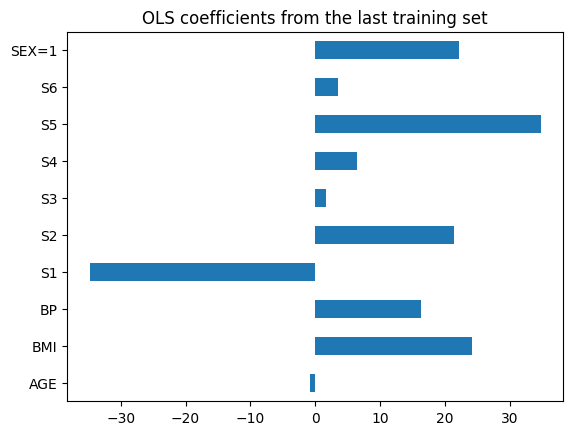

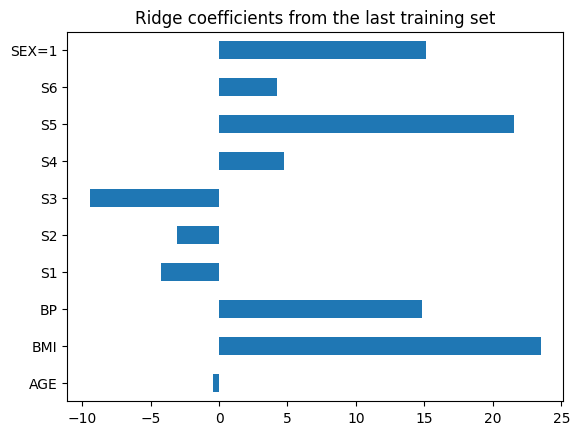

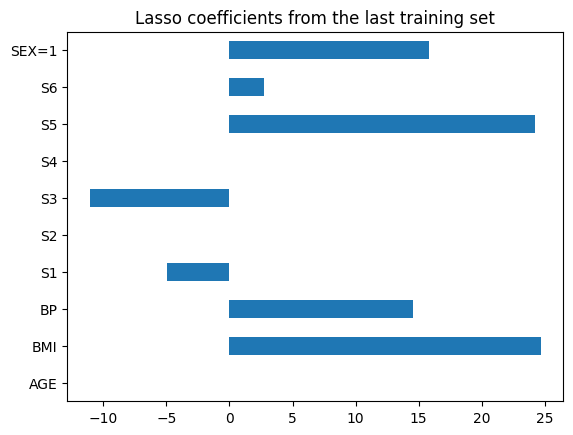

In [13]:
plt.figure()
coefs_ = pd.Series(lr.coef_, index=X.columns)  # to make things pretty
coefs_.plot(kind='barh')
plt.title('OLS coefficients from the last training set')

plt.figure()
coefs_ = pd.Series(ridge.coef_, index=X.columns)  # to make things pretty
coefs_.plot(kind='barh')
plt.title('Ridge coefficients from the last training set')

plt.figure()
coefs_ = pd.Series(lasso.coef_, index=X.columns)  # to make things pretty
coefs_.plot(kind='barh')
plt.title('Lasso coefficients from the last training set')

In [14]:
# Check the shape of coefs_ridge
coefs_ridge = np.array(coefs_ridge)
print(coefs_ridge.shape)

(100, 10)


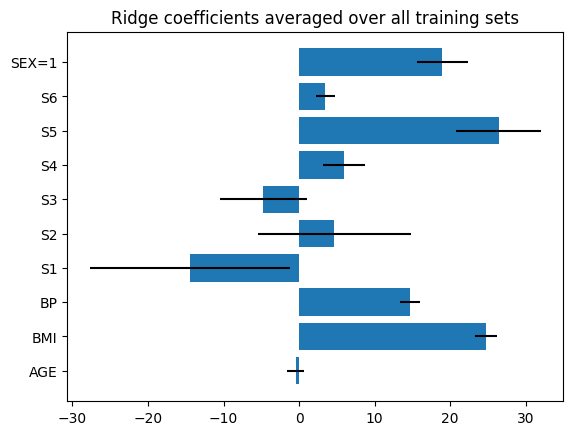

In [15]:
coefs = np.array(coefs_ridge)
coefs.shape
plt.barh(y=range(coefs.shape[1]), width=coefs.mean(axis=0), xerr=coefs.std(axis=0))
plt.title('Ridge coefficients averaged over all training sets')
plt.yticks(range(coefs.shape[1]), X.columns)
plt.show()

We note that if 0 is within the std error bar, then we can conclude that we have failed to reject the null hypothesis. 

### Question 7:
Take a look at some penalty parameters that are selected by the RidgeCV and LassoCV methods. The following parameters are those found with the last test set:

In [16]:
print("Example Ridge penalty found by CV:", ridge.alpha_)
print("Example Lasso penalty found by CV:", lasso.alpha_)

Example Ridge penalty found by CV: 32.32390909090909
Example Lasso penalty found by CV: 1.011090909090909


### Question 8:
Many people would just choose the model with the best average metric over the test sets. (Which would you choose in that case?)

*** 

But I would like you to consider the *noise* over the test sets. Plot boxplots (look at the plt.boxplot() method) to compare the *populations* of test errors across the methods. Does any method look like it consistently outperforms the others?

Consider running a statistical (hypothesis) test that two of these sets of scores significantly differ. (Use the scipy.stats.ttest_rel() method to run a paired t-test, which tests whether the means of two paired samples differs significantly.)


OLS ave test error: 54.697880400146325
Ridge ave test error: 54.804409885028306
Lasso ave test error: 54.83966510141513


Text(0, 0.5, 'RMSE')

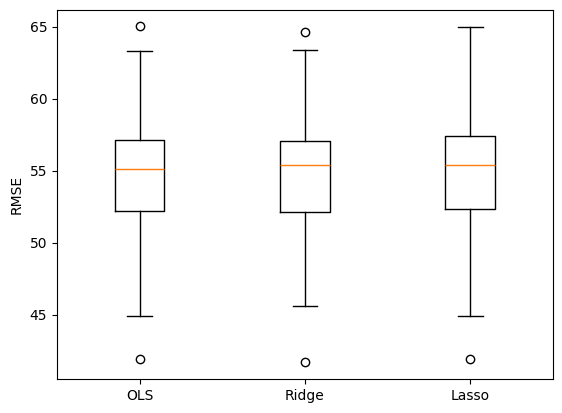

In [17]:
print("OLS ave test error:", np.mean(errors_lr))
print("Ridge ave test error:", np.mean(errors_ridge))
print("Lasso ave test error:", np.mean(errors_lasso))

plt.boxplot([errors_lr, errors_ridge, errors_lasso])
plt.xticks([1, 2, 3], ['OLS', 'Ridge', 'Lasso'])
plt.ylabel('RMSE')

In [ ]:
from scipy.stats import ttest_rel

p_ = ttest_rel(errors_lr, errors_ridge).pvalue
print("p-value of paired t-test between OLS and Ridge:", p_)

p_ = ttest_rel(errors_lr, errors_lasso).pvalue
print("p-value of paired t-test between OLS and Lasso:", p_)

p_ = ttest_rel(errors_lasso, errors_ridge).pvalue
print("p-value of paired t-test between Lasso and Ridge:", p_)

p-value of paired t-test between OLS and Ridge: 0.020889384404871387
p-value of paired t-test between OLS and Lasso: 0.0020021340150635984
p-value of paired t-test between Lasso and Ridge: 0.3287776087954507


In this case, OLS seems to be significant compared to Ridge and lasso, so it seems to be consistenly outperforming the ridge and lasso model.

This is a hard dataset and hard problem. I would say that this dataset has a low signal-to-noise ratio. It's a hard prediction to perform. This happens all the time in real life. Sometimes the right thing to tell your boss/client is that we aren't really able to make a robust prediction of Y using X, given the methods we have used.